#Uploading neccessary libraries and dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
import missingno as msno

In [ ]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_excel('orders_data.xlsx')

#Data Cleaning

<Axes: >

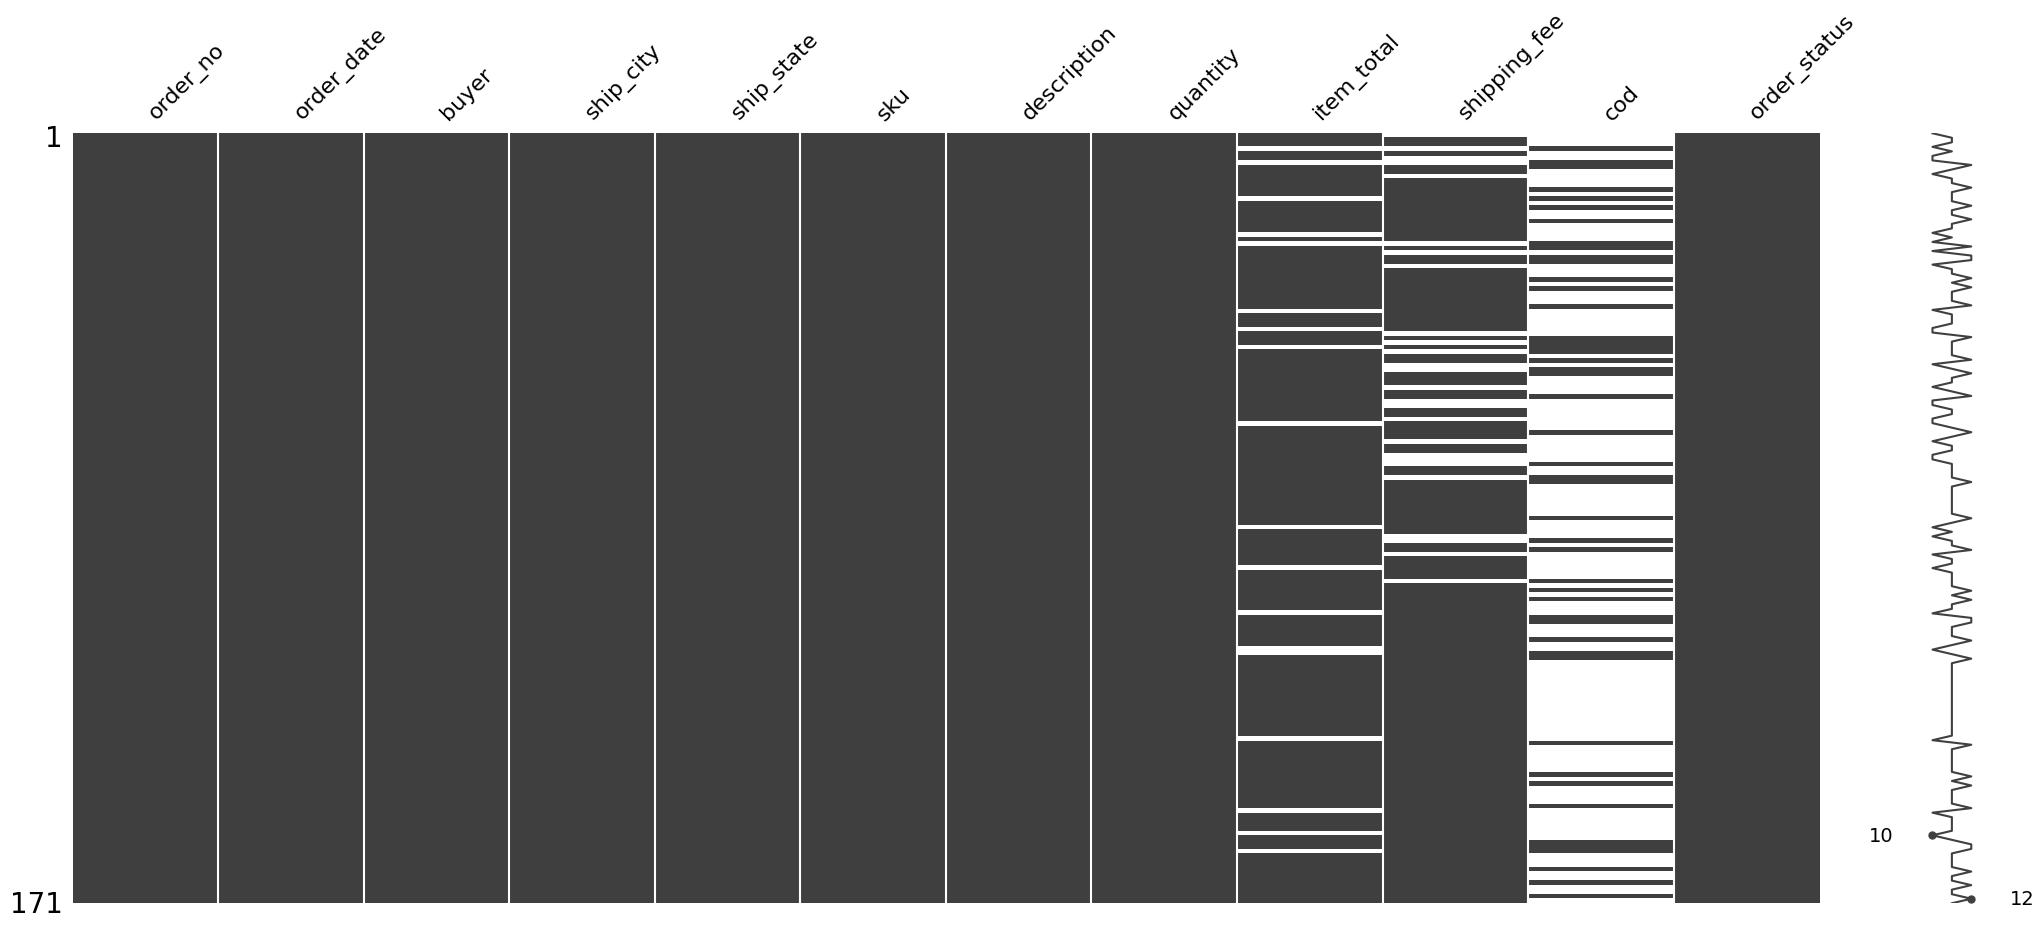

In [ ]:
msno.matrix(df)

In [ ]:
df.isna().sum()

order_no          0
order_date        0
buyer             0
ship_city         0
ship_state        0
sku               0
description       0
quantity          0
item_total       18
shipping_fee     26
cod             124
order_status      0
dtype: int64

In [ ]:
#as description of dataset is saying cod is either cash on delivery or no [null]
#lets fill the cod empty values by no
df.cod.fillna('no',inplace = True)

In [ ]:
amounts = ['item_total', 'shipping_fee']
for i in amounts:
    df[i] = df[i].apply(lambda x: str(x).replace(',', ''))        # remove the commas in amounts greater than 1000
    df[i] = df[i].apply(lambda x: x[1:])

In [ ]:
#shipping fee has null places also 
df

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.00,an,no,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.00,60.18,no,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.00,60.18,no,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,an,an,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,1099.00,84.96,no,Delivered to buyer
...,...,...,...,...,...,...,...,...,...,...,...,...
166,171-2829978-1258758,"Mon, 13 Dec, 2021, 11:30 am IST",Shahin,"MUMBAI,",MAHARASHTRA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,3,1347.00,84.96,Cash On Delivery,Delivered to buyer
167,402-3045457-5360311,"Wed, 1 Dec, 2021, 12:18 pm IST",Sharmistha,"DEHRADUN,",UTTARAKHAND,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,1299.00,114.46,no,Delivered to buyer
168,408-2260162-8323567,"Thu, 9 Dec, 2021, 6:55 pm IST",shashank,"Durg,",CHHATTISGARH,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,1299.00,105.02,no,Delivered to buyer
169,403-5664951-8941100,"Wed, 23 Feb, 2022, 12:43 am IST",Jayeta,"KOLKATA,",WEST BENGAL,SKU: N8-YFZF-P74I,Stylish and Sleek Multiple Pockets 100 Percent...,1,1499.00,80.24,Cash On Delivery,Delivered to buyer


<Axes: >

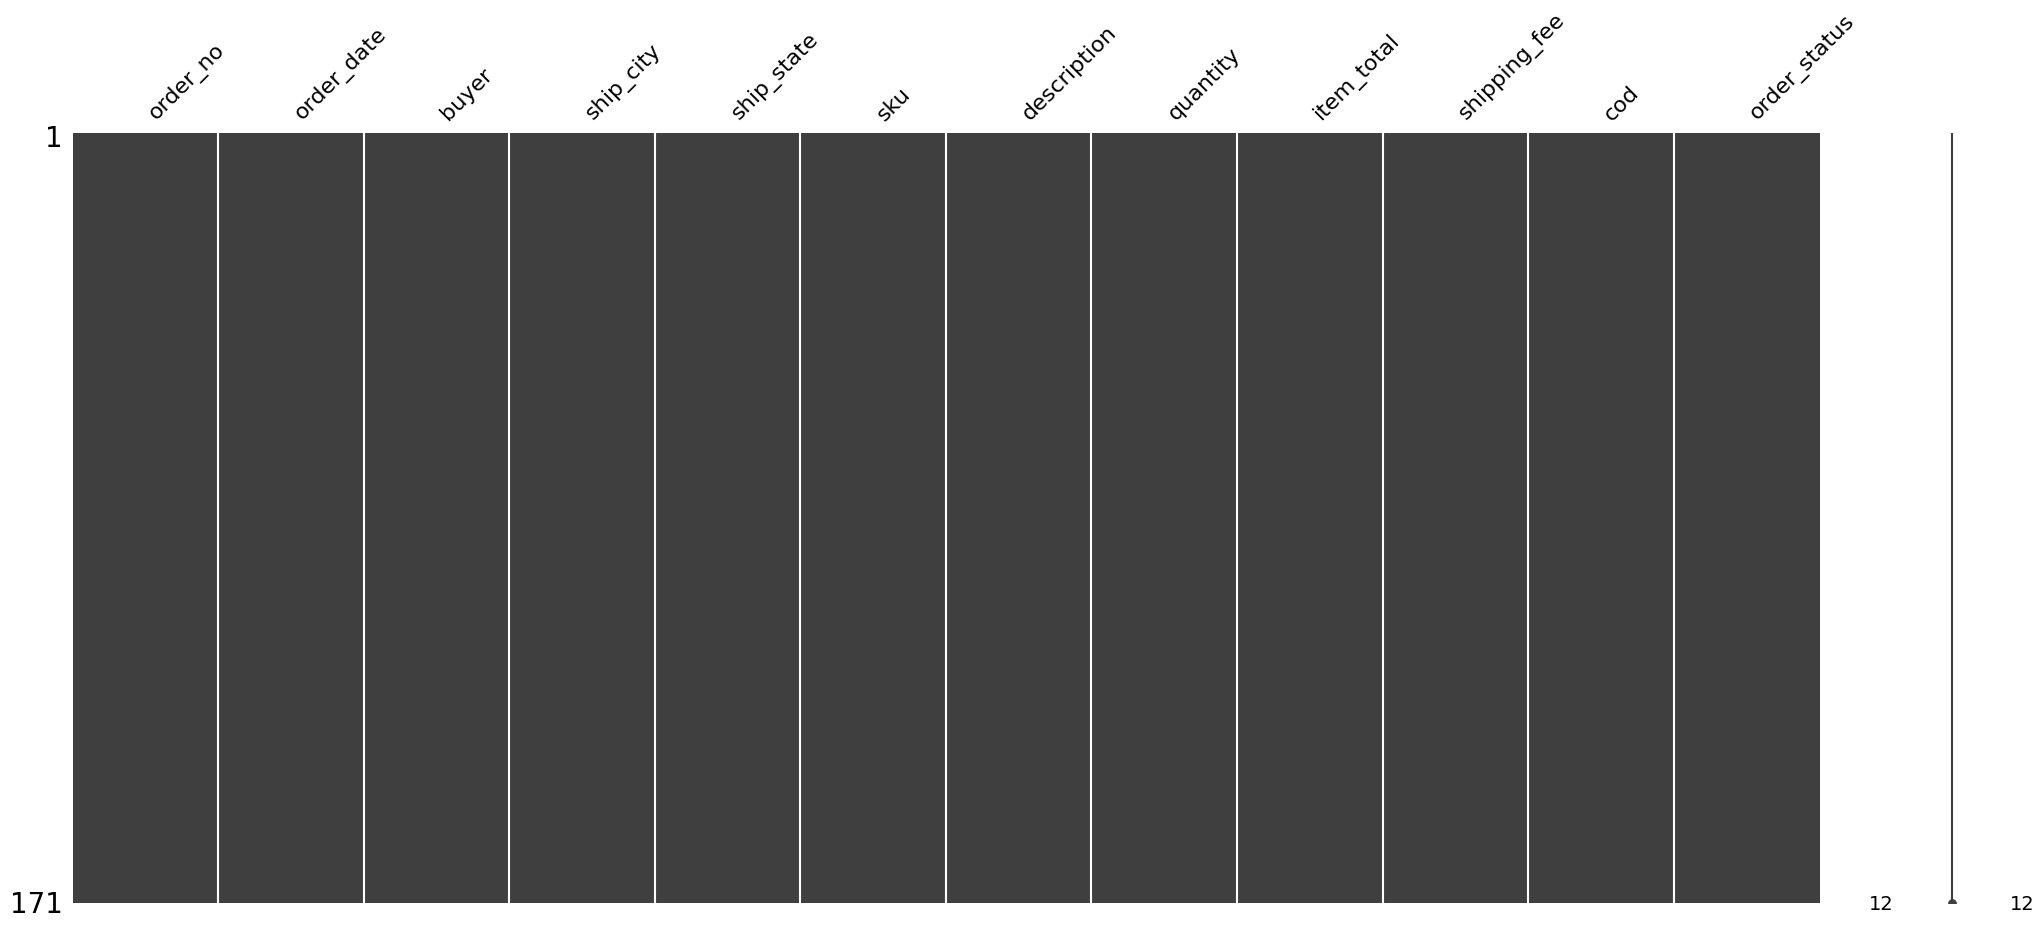

In [ ]:
msno.matrix(df)

#Data Exploration and Analysis



In [ ]:
#get to know your data a little before Modelig
#buyer and date seems fine

<Axes: xlabel='count', ylabel='ship_city'>

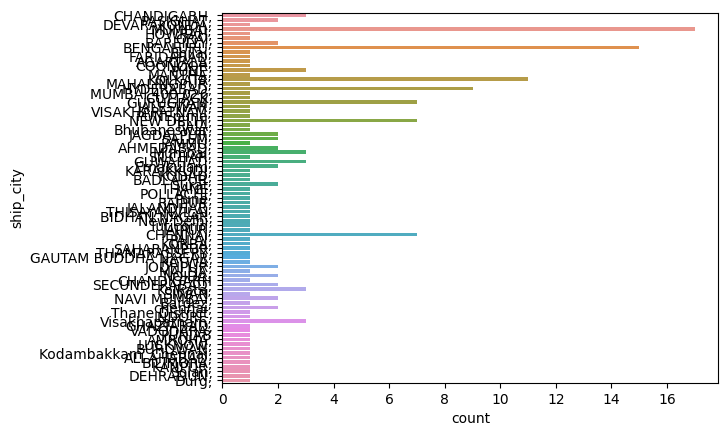

In [ ]:
sns.countplot(data = df , y = "ship_city")

<BarContainer object of 10 artists>

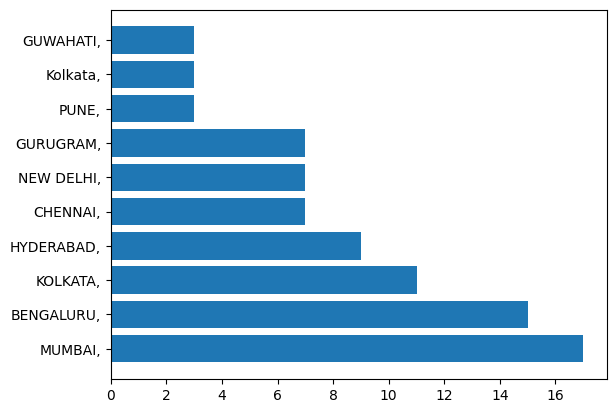

In [ ]:
plt.barh(df.ship_city.value_counts()[:10].index ,df.ship_city.value_counts()[:10].values )

<BarContainer object of 4 artists>

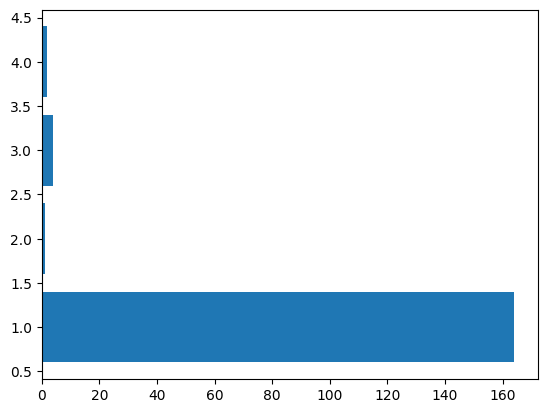

In [ ]:
plt.barh(df.quantity.value_counts()[:10].index ,df.quantity.value_counts()[:10].values )

In [ ]:
df.quantity.value_counts()

1    164
3      4
4      2
2      1
Name: quantity, dtype: int64

In [ ]:
#so majority is requesting one item

<Axes: >

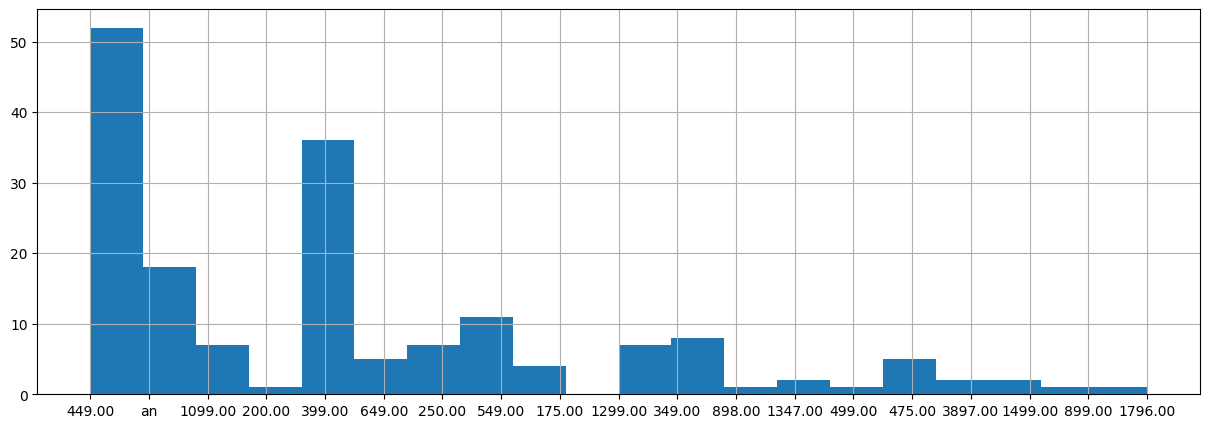

In [ ]:
plt.rcParams['figure.figsize'] = [15, 5]
df.item_total.hist(bins = 20)

In [ ]:
#as you see we hav (an) value wich means its null but I thing I by mistake make it an when I was trimming the currency sign
df.item_total = df.item_total.apply(lambda x: np.nan if 'an' in x else x)

In [ ]:
df.item_total.fillna(df.item_total.median(), inplace = True)

In [ ]:
df.item_total.dtype

dtype('O')

In [ ]:
df.item_total = df.item_total.astype(np.float)

<ipython-input-20-0cd5f7c014ba>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.item_total = df.item_total.astype(np.float)


In [ ]:
df.shipping_fee = df.shipping_fee.apply(lambda x: np.nan if 'an' in x else x)

In [ ]:
df.shipping_fee.fillna(df.shipping_fee.median(),inplace = True)

In [ ]:
df.shipping_fee.dtype

dtype('O')

In [ ]:
df.shipping_fee = df.shipping_fee.astype(np.float)

<ipython-input-24-16c9a241d5b4>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.shipping_fee = df.shipping_fee.astype(np.float)


<Axes: >

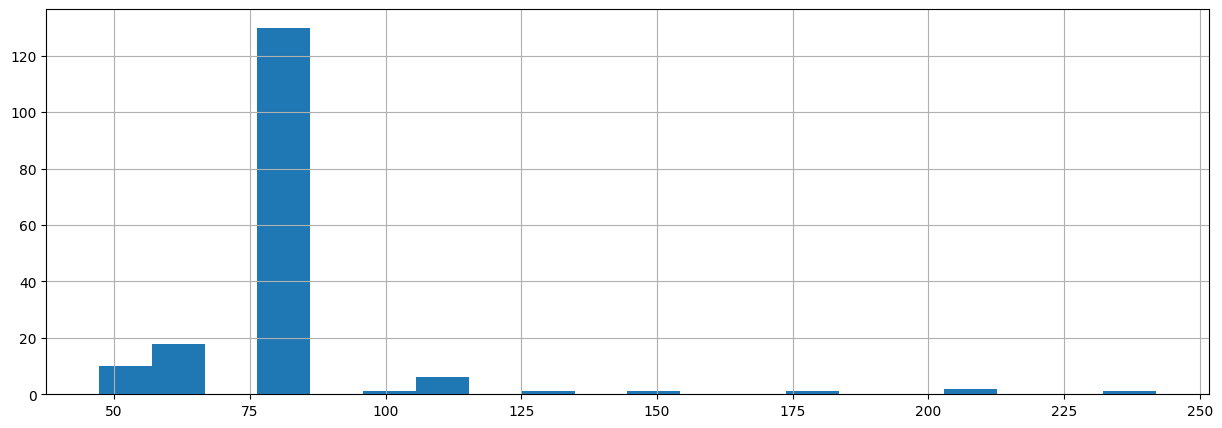

In [ ]:
df.shipping_fee.hist(bins = 20)

In [ ]:
df.shipping_fee.median()

84.96

<Axes: xlabel='count', ylabel='cod'>

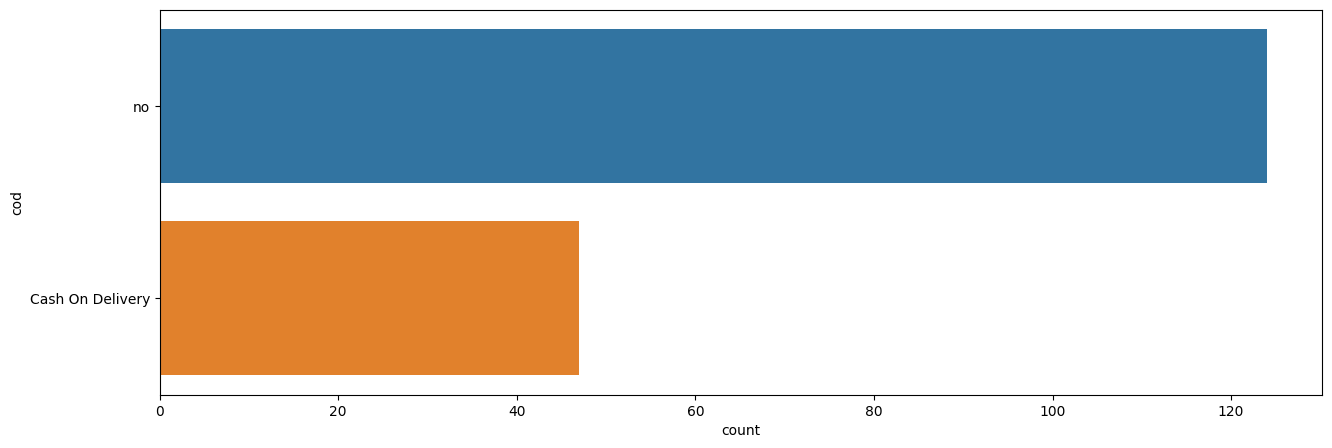

In [ ]:
sns.countplot(data = df , y ='cod')

<Axes: xlabel='count', ylabel='order_status'>

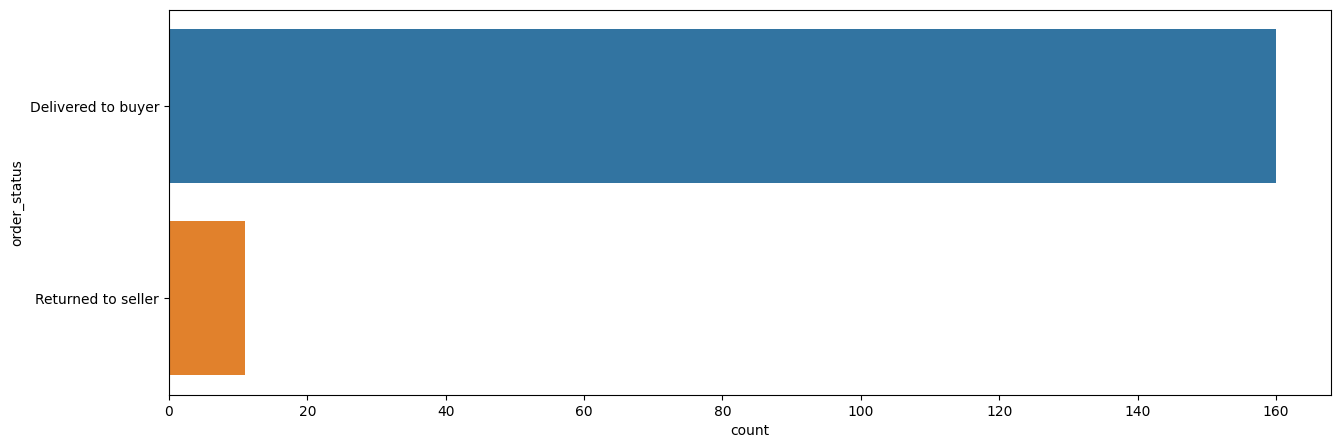

In [ ]:
sns.countplot( data = df , y = 'order_status')

<Axes: xlabel='count', ylabel='order_status'>

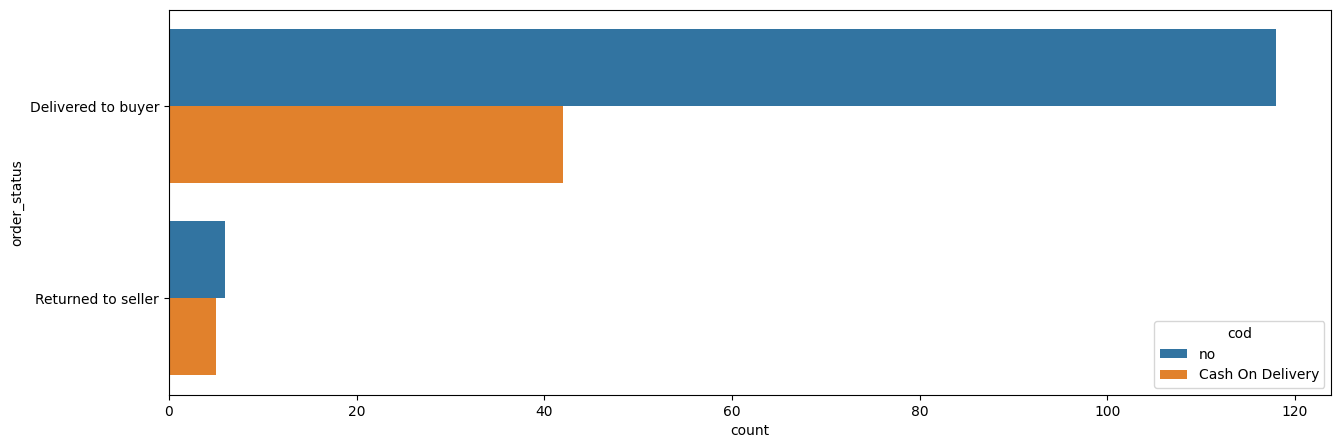

In [ ]:
sns.countplot( data = df , y = 'order_status' , hue = 'cod')

In [ ]:
#mmm return to seller has a lot of cash_on_delivery

<Axes: xlabel='count', ylabel='ship_city'>

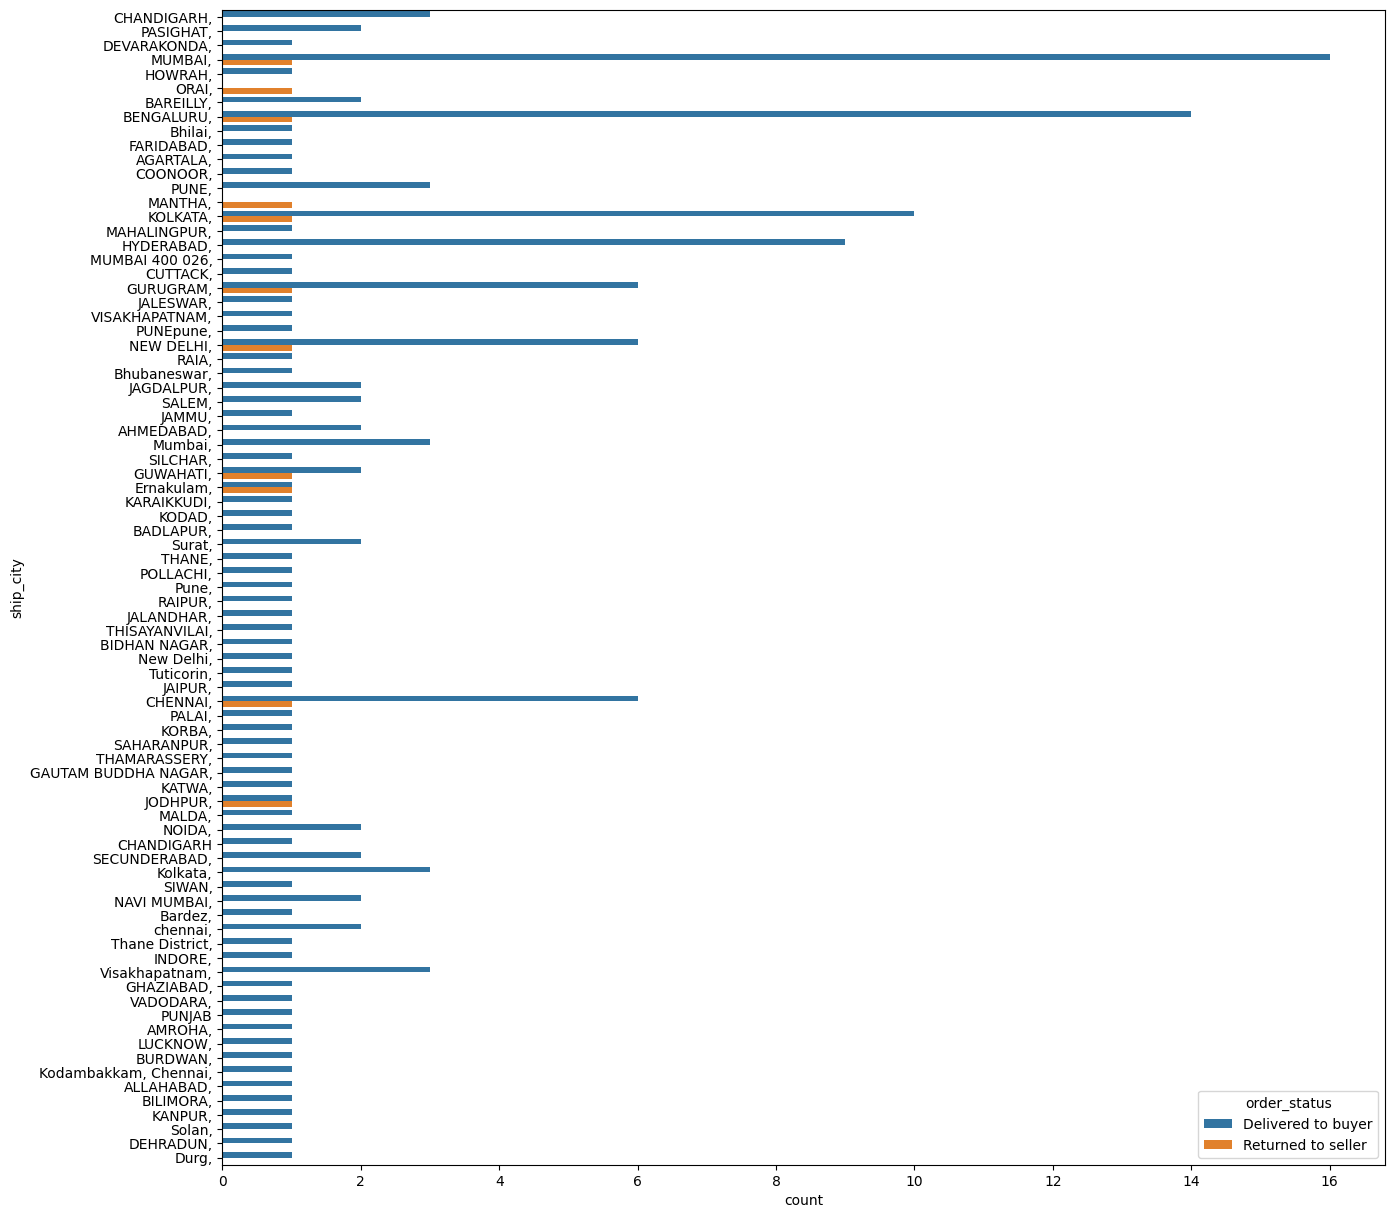

In [ ]:
plt.rcParams['figure.figsize'] = [15, 15]
sns.countplot( data = df , hue = 'order_status' , y = 'ship_city')

In [ ]:
#apparently not all cities are returning their order back .. we should consider this as a note for our manger

In [ ]:
df.order_status = df.order_status.apply(lambda x: 0 if  x != 'Delivered to buyer' else 1)

In [ ]:
df[df.order_status == 0]

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
6,404-5794317-7737924,"Thu, 12 Aug, 2021, 8:03 pm IST",shailendra,"ORAI,",UTTAR PRADESH,SKU: TQ-OE6K-9DIK,Ultra Slim 100% Pure Leather Men's Wallet with...,1,449.0,84.96,Cash On Delivery,0
14,408-9557300-6760347,"Thu, 14 Oct, 2021, 11:14 pm IST",Satish,"MANTHA,",MAHARASHTRA,SKU: YJ-5CCT-M3PP,Pure Leather Camel Color Gent's Wallet with Co...,1,449.0,84.96,Cash On Delivery,0
22,171-6105173-4790734,"Fri, 26 Nov, 2021, 7:22 pm IST",Geetika,"GURUGRAM,",HARYANA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,84.96,no,0
24,403-7876698-8356365,"Fri, 25 Jun, 2021, 7:48 am IST",Yash,"MUMBAI,",MAHARASHTRA,SKU: 3O-GBSM-TYZE,100% Leather Ganesh Ji Piggy Coin Bank | Block...,1,449.0,84.96,Cash On Delivery,0
39,404-8031085-1381943,"Fri, 26 Nov, 2021, 9:12 pm IST",Kangana,"NEW DELHI,",DELHI,SKU: 54-D265-B74K,Set of 2 Pure Leather Block Print Round Jewelr...,4,449.0,84.96,no,0
43,405-8481932-1229966,"Sun, 31 Oct, 2021, 11:38 am IST",Amala,"KOLKATA,",WEST BENGAL,SKU: S1-A92Q-JU3X,100% Pure Leather Shantiniketan Clutch Purse: ...,1,449.0,47.20,no,0
47,405-1981073-5970737,"Tue, 5 Oct, 2021, 8:53 pm IST",Jitu,"GUWAHATI,",ASSAM,SKU: I1-AWVT-2QOL,Women's Pure Leather Jhallar Clutch Purse with...,1,449.0,60.18,Cash On Delivery,0
114,405-0209265-6273962,"Sun, 23 Jan, 2022, 9:37 am IST",Gargi,"Ernakulam,",KERALA,SKU: V6-KQJX-XGP2,Women's Pure Leather Jhallar Clutch Purse with...,1,449.0,84.96,no,0
134,171-3919731-3769907,"Tue, 25 Jan, 2022, 11:32 am IST",Deepali,"JODHPUR,",RAJASTHAN,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,84.96,no,0
150,405-7352232-5348320,"Sun, 19 Dec, 2021, 7:41 am IST",DIVYA,"BENGALURU,",KARNATAKA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.0,84.96,no,0


In [ ]:
df.ship_city = df.ship_city.apply(lambda x: str(x).replace(',',''))
df_final = df

#Splitting dependent and Independent variables (X and Y)

In [ ]:
features_interest = ['ship_city', 'ship_state' , 'quantity', 'item_total', 'shipping_fee', 'cod',
       'order_status']

In [ ]:
df_ml = df[features_interest]
x = df_ml[features_interest[:-1]]
y = df_ml[features_interest[-1]]

#Importing Models and Fitting

In [ ]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20,25]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(pd.get_dummies(x), y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_results = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_results



,model,best_score,best_params
0,svm,0.935798,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.929916,{'n_estimators': 5}
2,logistic_regression,0.935798,{'C': 1}
